# Matrices

In this section, we will learn how to use matrices in SymPy. 

- Constructing matrices
- Basic matrix methods and operations
- Symbolic vs. numeric matrices
- Matrix Expressions

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing()

## Constructing Matrices

Matrices in SymPy are constructed with the `Matrix` class. Matrices can be constructed as a list of lists of elements, where each outer list is a list of row vectors that make up the matrix. For example, to construct the matrix

$$\begin{split}\left[\begin{array}{cc}1 & -1\\3 & 4\\0 & 2\end{array}\right]\end{split}$$

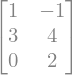

In [2]:
M = Matrix([[1, -1], [3, 4], [0, 2]])
M

You can also construct a column vector (matrix) by pasing a single list of values)

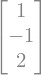

In [3]:
a = Matrix([1, -1, 2])
a

Another way to construct a matrix is with a formula for the elements, using `Matrix(n, m, f)`, `n` and `m` are the number of rows and columns of the matrix, and `f` is a function that takes `f(i, j)` and returns the $i, j$ element of the matrix.

For example, to construct the matrix $$[ i + j ]_{3,4}$$

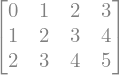

In [4]:
Matrix(3, 4, lambda i, j: i + j)

SymPy also has some special constructors for common types of matrices

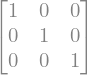

In [5]:
eye(3) # identity matrix

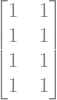

In [6]:
ones(4, 2) # matrix of all ones

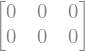

In [7]:
zeros(2, 3) # matrix of all zeros

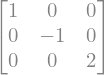

In [8]:
diag(1, -1, 2) # matrix with specified entries along the diagonal

### Exercises

Use the matrix constructors to construct the following matrices.  There may be more than one correct answer.

$$\left[\begin{matrix}2 & 3\\0 & 1\end{matrix}\right]$$

$$\left[\begin{array}{ccc}4 & 0 & 0\\\\ 
0 & 4 & 0\\\\ 
0 & 0 & 4\end{array}\right]$$

$$\left[\begin{matrix}0 & 0 & 0\\1 & 1 & 1\\2 & 2 & 2\end{matrix}\right]$$

## Basic Matrix Methods

Note that unlike NumPy arrays, SymPy matrices are always 2-dimensional ($n\times m$). You can get the number of rows and columns of a matrix with the `rows` and `cols` attributes.

### Indexing matrix

You can use `A[i, j]` for indexing SymPy matrix 

(You should not use `A[i][j]`)

In [9]:
a[1, 0]

Use `rows, cols, shape` to get the matrix shape, 

which is useful for getting the bounds for iterating over the matrix elements.

In [10]:
a.rows

In [11]:
a.cols

In [12]:
a.shape

### Adding and multiplying matrix

Matrices support the basic arithmetic operations. 

Note that `*` does matrix multiplication (you can also use `@`), as well as scalar-matrix multiplication.

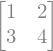

In [13]:
A = Matrix([[1, 2], [3, 4]])
A

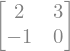

In [14]:
B = Matrix([[2, 3], [-1, 0]])
B

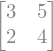

In [15]:
A + B

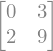

In [16]:
A * B # Matrix multiplication

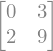

In [17]:
A @ B # Same as A*B

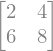

In [18]:
2*A # Scalar-matrix multiplication

If you want to do elementwise multiplication like numpy you should use `.multiply_elementwise` 

(it's rarely used if you want to do mathematical work.)

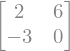

In [19]:
A.multiply_elementwise(B) # NumPy like multiplication

### Matrix shape

Note that SymPy is strict about matrix shapes. 

It does not support implicitly treating a $1\times 1$ matrix as a scalar. 
To convert a matrix into a scalar, use indexing to extract the element.

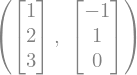

In [20]:
a = Matrix([1, 2, 3])
b = Matrix([-1, 1, 0])
a, b

In [21]:
s = a.T*b # Dot product. Note that a.T is the transpose of a
s

In [22]:
s + 4 # An error

TypeError: cannot add <class 'sympy.matrices.dense.MutableDenseMatrix'> and <class 'int'>

In [ ]:
s[0, 0] + 4

Matrices support common linear algebra operations. Most operations are present as methods on the matrix object. You can use tab completion to see all the available methods. 

In [ ]:
M = Matrix([[2, 0, 0], [0, 2, 0], [-4, -4, 4]])
M

In [ ]:
M. # Place your cursor to the right of the . and press TAB

### Linear algebra

A few useful ones are `eigenvals` and `eigenvects` to get eigenvalues and eigenvalue-eigenvector pairs. 

`eigenvects()` returns a list of tuples of the form `(eigenvalue, multiplicity, eigenvector_basis`).

In [ ]:
M.eigenvals()

In [23]:
M.eigenvects()

DMNonSquareMatrixError: not square

The `A.solve(rhs)` method of a matrix solves a matrix equation $Ax=rhs$

In [24]:
out = M.solve(Matrix([2, -6, 15]))
out

NonInvertibleMatrixError: Matrix det == 0; not invertible.

In [25]:
M * out

NameError: name 'out' is not defined

You can use SymPy matrix to verify fairly complicated matrix identities

(like Sherman–Morrison formula)

by expansion that cannot be easily done by hand.

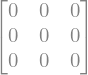

In [26]:
u, v, w = symbols('u v w')
x, y, z = symbols('x y z')

I = eye(3)
u = Matrix([u, v, w])
v = Matrix([x, y, z])
lhs = (I + u*v.T).inv()
rhs = I - (u*v.T) / (1 + v.dot(u))
simplify(lhs - rhs)

An other example of how you can use symbolic matrix in practice

is computing an explicit formula of bilinear interpolation.

A biliniar interpolation is finding coefficients $c_0, c_1, c_2, c_3$ of polynomial function

$$f = c_0 + c_1 x + c_2 y + c_3 x y$$

Where the values of the functions are known at points 
$$(x_0, y_0), (x_0, y_1), (x_1, y_0), (x_1, y_1)$$

Finding a solution of the problem involves writing down an equation with lots of variables

and it is not easy to express the solution by hand, without using special algebraic techniques.

However, with SymPy, it is easy to find the solutions
and you can generalize this technique to extend to trilinear, ... so on.

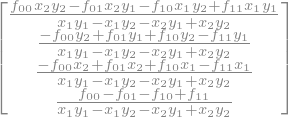

In [27]:
x1, x2 = symbols('x_1 x_2')
y1, y2 = symbols('y_1 y_2')

f00, f01, f10, f11 = symbols('f_00 f_01 f_10 f_11')

M = Matrix([
    [1, x1, y1, x1*y1],
    [1, x1, y2, x1*y2],
    [1, x2, y1, x2*y1],
    [1, x2, y2, x2*y2]
])
b = Matrix([f00, f01, f10, f11])
M.solve(b)

## Symbolic vs. Numeric Matrices

It is important to note that SymPy matrices are designed to work with **symbolic** matrices. Matrix entries should be exact numbers and symbolic function:

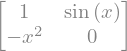

In [28]:
Matrix([[1, sin(x)], [-x**2, 0]])

What this means is that SymPy always tries to compute things exactly.

Calculations like eigenvalues, can get very complicated.

For example, the following eigenvalues of `3*3` matrix is very complicated
because it needs to solve the cubic equations completely.

In [29]:
M = Matrix([[2, -1, 3], [1, 2, 0], [0, 1, 2]])

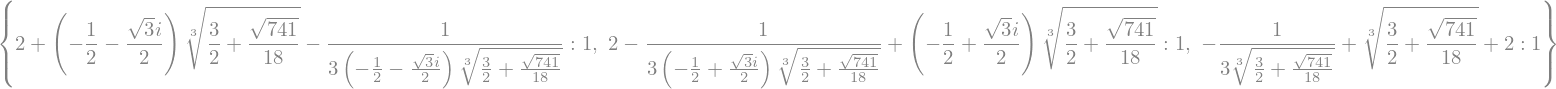

In [30]:
M.eigenvals()

If this is not what you want, and you want decimal results that are more compact

you are much better of using a numerical library like `numpy.linalg`.

In [31]:
import numpy as np

m = np.asarray(M, dtype=float)
np.linalg.eigvals(m)

array([1.39329417+1.45061225j, 1.39329417-1.45061225j,
       3.21341166+0.j        ])

However, if you want to 'count' the eigenvalues

getting the algebraically correct result is important.

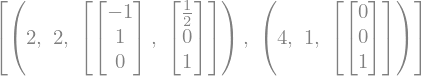

In [32]:
M_float = Matrix([[2, 0, 0], [0, 2, 0], [-4, -4, 4]])
M_float.eigenvects()

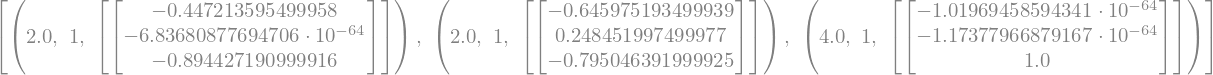

In [33]:
M_float = Matrix([[2.0, 0.0, 0.0], [0.0, 2.0, 0.0], [-4.0, -4.0, 4.0]])
M_float.eigenvects()

In this case, the `2.0` eigenvalue is not listed as repeated. 

This is because two eigenvalues are slightly different in floating points.

And you can't easily 'count' such results.

### Large matrices

You should also be aware that SymPy's matrix algorithms are designed for small sized matrices

These algorithms do not behave as same as fast linear algebra library like LAPACK,

which can operate on large matrix like 1000*1000.

In SymPy, even for smaller sized matrix, the result can get very complicated or slow:

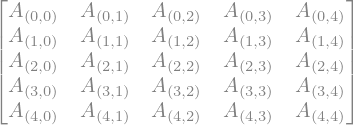

In [34]:
A = Matrix(5, 5, lambda i, j: Symbol(f"A_{i,j}"))
A

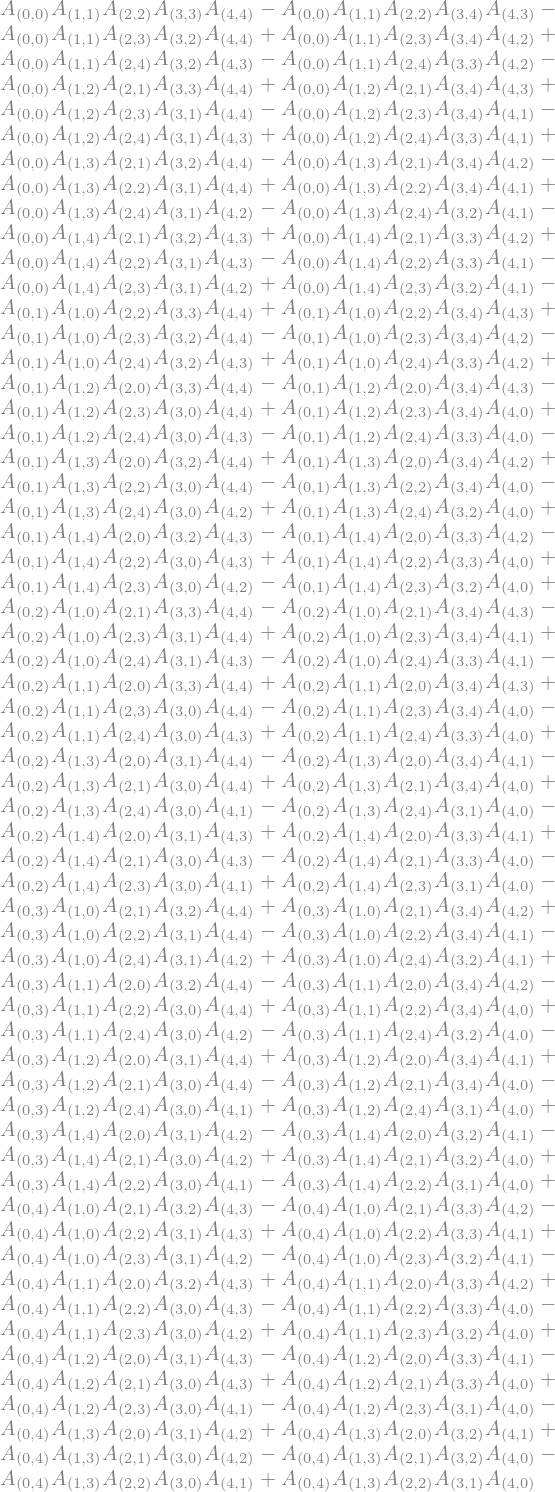

In [35]:
A.det()

The symbolic determinant of an $n\times n$ matrix has $n!$ terms. 

While the above expression for the $5\times 5$ case is manageable, it would be slow even with the computer, when $n$ is larger. 

This is relevant because, for instance, the general formula for $A^{-1}$ involves $|A|$.

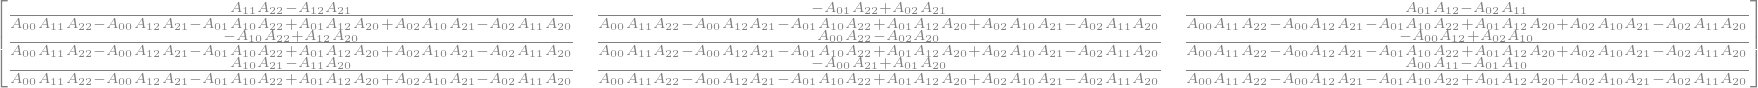

In [36]:
B = Matrix(3, 3, lambda i, j: Symbol(f"A_{i}{j}")) 
# The 3x3 case is already large. Larger cases are too slow because they are so large and because of some issues in SymPy right now.
B**-1

Symbolic matrix inverses are something that you should only compute if the matrix is small enough 

or if the solution is small enough.

If you want to represent the arbitrarily large matrix multiplication or inverse,

you should not compute with each elements symbolically,

but try to represent the whole matrix computation symbolically with matrix expressions.

Note that you can symbolically represent the inverse of a matrix without actually computing it using `Inverse` (see the next section).

## Matrix Expressions

SymPy also supports representing matrices where the dimensions $n$ and $m$ are themselves symbolic. These are called matrix expressions. To create a matrix expression, start with `MatrixSymbol`, which works like `Symbol`, except it also contains a number of rows and columns.

In [37]:
n, m, k = symbols('n, m, k', integer=True)
A = MatrixSymbol("A", n, m)
B = MatrixSymbol("B", m, n)
A, B

You can then create matrix formulas from these expressions using the usual operations.

In [38]:
A*B

In [39]:
(A*B).T

Similar as how `Matrix` operates,

Shapes must match or you will get an error. The shape of a matrix expression can be accessed with `.shape`.

In [40]:
A + B

In [41]:
(A*B).shape

There are also functions to represent special matrix and matrix functions.

(You need to use `.doit` to compute the algebra over matrices)

In [42]:
I = Identity(n)

In [43]:
A*B + I

In [44]:
Transpose(A*B).doit()

In [45]:
Determinant(A*B).doit()

In [46]:
Trace(A*B).doit()

In [47]:
Inverse(A*B)

Similar to how the assumption system in symbol works,

the matrix shape affects some matrix properties like

- $(A B)^{-1} = B^{-1} A^{-1}$
- $|AB| = |A||B|$

(See how the results are different for square matrices)

In [48]:
A = MatrixSymbol('A', n, n)
B = MatrixSymbol('B', n, n)

Inverse(A*B).doit()

In [49]:
Determinant(A*B).doit()

### Symbolic Matrix with Explicit Matrix

These functions can also be used on explicit matrices to represent them without evaluation. 

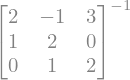

In [50]:
Inverse(M)

You can combine matrix expressions and explicit matrices. 


In [51]:
C = MatrixSymbol("C", 3, 3)

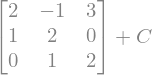

In [52]:
C + M

If a matrix expression has an explicit numerical shape (nonsymbolic), you can compute its entries with `.as_explicit()`.

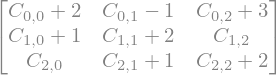

In [53]:
(C + M).as_explicit()

You can also substitute a matrix symbol with an explicit matrix. This will not evaluate by default unless you call `as_explicit()`.

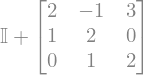

In [54]:
expr = (C + Identity(3)).subs({C: M})
expr

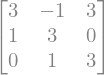

In [55]:
expr.as_explicit()

As with normal matrices, SymPy is strict about shapes. 

You can multiply a matrix expression by a scalar expression, but you cannot add a matrix expression and a scalar expression (even if it is $1\times 1$).

In [56]:
D = MatrixSymbol("D", 1, 1)

In [57]:
x*D

In [58]:
D + x

TypeError: Mix of Matrix and Scalar symbols

If you want a matrix, use $xI$. If you want a scalar, use indexing `D[0, 0]`.

In [ ]:
D + x*Identity(1)

In [ ]:
_.as_explicit()

In [ ]:
D[0, 0] + x

## Exercises

Construct the following matrix expressions, where $A$ is $n\times n$, $B$ is $m\times m$, $C$ is $n \times m$, and $x$ is a scalar `Symbol`.

$$A - xI$$
$$BC^TA$$
$$(B^2 + I)^{-1}$$
$$tr(A) + x$$